In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Intraday Price Action Observation

*Note: Intraday return is defined as price at point in time compared to open price during the same trading day. Data has 15 min intervals, with time indicating the start of the 15 minutes. For example, 2010-01-04 09:30 refers to the 15 min interval [09:30-09:45], with return between 09:30 and 09:45, and 2010-01-04 15:45 refers to the 15 min interval [15:45-16:00], with the return between 9:30 and 16:00 (daily return).*

### Introduction

**Is there a time window during a typical trading session that stocks tend to go higher compared to open price?** Imagine a systematic trading strategy where signals are generated at market open and we are trying to determine the exit time. Alongside with typical exit signals such as SMA crossovers, we can also observe the general pattern of intraday price action, if there is one empirically. For example, if on average it benefits the trader to close the position between 11:30 and 13:30, one can add such constraint as part of the exit signal.

**In this project, we examine the intraday return of 100 stocks from S&P 100 index (excluding META due to data quality issues), between 2010-01-04 and 2022-12-30. The goal is to find any relatable patterns across the trading universe.** Note that we do not apply any trading signals here in this exercise. It is meant to be observational. (In another research project, we do apply an open gap trading signal and use the framework of this project to determine the optimal exit time.)

### Load Dataset

In [2]:
intraday = pd.read_csv('./data/intraday return/SP 100 - Intraday Return.csv',index_col = 0, header=[0,1])

In [3]:
intraday = intraday.stack()

# meta has some data quality issues in the dataset.
selected = [i for i in intraday.columns if i!='META']

intraday = intraday[selected]
intraday

Day                   AAPL      ABBV       ABT       ACN      ADBE       AIG  \
2010-01-04 09:30  0.002625       NaN  0.003322  0.009152  0.012005 -0.030789   
           09:45  0.000000       NaN  0.002584  0.009393  0.010914 -0.026531   
           10:00 -0.002625       NaN  0.003322  0.008911  0.009550 -0.027841   
           10:15  0.001312       NaN  0.003691  0.006985  0.011733 -0.031444   
           10:30  0.001312       NaN  0.002584  0.009152  0.012824 -0.027186   
...                    ...       ...       ...       ...       ...       ...   
2022-12-30 14:45 -0.001012 -0.009431 -0.006284 -0.007042 -0.001351 -0.003952   
           15:00  0.004361 -0.006287 -0.003188 -0.000753  0.004204 -0.001739   
           15:15  0.003894 -0.007150 -0.002641 -0.002034  0.003754 -0.003320   
           15:30  0.005062 -0.005178 -0.000911  0.000640  0.004234 -0.001265   
           15:45  0.011837 -0.003205  0.000273  0.004896  0.010601 -0.000316   

Day                    AMD      AMGN       AMT      AMZN  ...       UNH  \
2010-01-04 09:30  0.004086  0.011831  0.006898 -0.004405  ... -0.004779   
           09:45  0.005107  0.014480  0.006898  0.000000  ... -0.007009   
           10:00  0.003064  0.015893  0.003909 -0.010279  ... -0.006690   
           10:15  0.008172  0.016069  0.004599 -0.010279  ... -0.004141   
           10:30  0.011236  0.015363  0.002529 -0.013216  ... -0.004779   
...                    ...       ...       ...       ...  ...       ...   
2022-12-30 14:45  0.001725 -0.009744 -0.023935 -0.005895  ... -0.005528   
           15:00  0.005959 -0.006318 -0.018056 -0.001203  ... -0.002755   
           15:15  0.005175 -0.006813 -0.016843 -0.002045  ... -0.002774   
           15:30  0.007370 -0.005595 -0.014697  0.000481  ... -0.002245   
           15:45  0.015681 -0.000343 -0.011524  0.010587  ...  0.000340   

Day                    UNP       UPS       USB         V        VZ       WBA  \
2010-01-04 09:30 -0.000620  0.004827 -0.000442 -0.001818 -0.000899       NaN   
           09:45  0.002169  0.012929  0.003540 -0.002273 -0.001799       NaN   
           10:00  0.004648  0.009826  0.001327  0.000000 -0.002398       NaN   
           10:15  0.005888  0.008964  0.004425  0.003182 -0.003897       NaN   
           10:30  0.005888  0.010343  0.003982  0.004545 -0.005096       NaN   
...                    ...       ...       ...       ...       ...       ...   
2022-12-30 14:45 -0.012857 -0.012108 -0.000691  0.000436 -0.005342 -0.006176   
           15:00 -0.008908 -0.007862  0.001152  0.004702 -0.002289 -0.004028   
           15:15 -0.010016 -0.008608  0.000691  0.003393 -0.000763 -0.003759   
           15:30 -0.006212 -0.005681  0.002535  0.005332  0.002544 -0.002417   
           15:45 -0.002889 -0.002755  0.005069  0.007464  0.002289  0.003222   

Day                    WFC       WMT       XOM  
2010-01-04 09:30  0.000370  0.006889  0.000728  
           09:45  0.000740  0.006144  0.000873  
           10:00 -0.000370  0.004282  0.002328  
           10:15  0.005551  0.004096  0.003492  
           10:30  0.002961  0.005586  0.002765  
...                    ...       ...       ...  
2022-12-30 14:45 -0.001946 -0.004733  0.011417  
           15:00  0.001459 -0.001837  0.012982  
           15:15  0.000000 -0.001766  0.012154  
           15:30  0.002432 -0.000212  0.014547  
           15:45  0.004622  0.001625  0.015744  

[84793 rows x 100 columns]

### Survivorship Bias

**To acknowledge the existence of survivorship bias, we list the average number of stocks available for each calendar year.** For example, in 2010, only 87 out of these 100 stocks were traded on the exchange. However, as an observation exercise, this project assumes survivorship bias has minimal impact on the general pattern of price action during a trading session.

In [4]:
temp = intraday.count(axis=1).unstack().reset_index()
temp['year'] = pd.to_datetime(temp['index']).dt.year
temp.groupby('year').mean().mean(axis=1).round().astype(int)

year
2010     87
2011     90
2012     90
2013     93
2014     94
2015     96
2016     97
2017     97
2018     97
2019     99
2020    100
2021    100
2022    100
dtype: int32

### Data Processing
**We convert the above dataset into one that we can easily perform analysis on.** Here, *Intraday_Return* is defined the same way as described in previous paragraph.

In [5]:
intraday2 = intraday.stack().reset_index()
intraday2.columns = ['Day','Time','Symbol','Intraday_Return']
intraday2['year'] = pd.to_datetime(intraday2['Day']).dt.year
intraday2.head(10)

,Day,Time,Symbol,Intraday_Return,year
0,2010-01-04,09:30,AAPL,0.002625,2010
1,2010-01-04,09:30,ABT,0.003322,2010
2,2010-01-04,09:30,ACN,0.009152,2010
3,2010-01-04,09:30,ADBE,0.012005,2010
4,2010-01-04,09:30,AIG,-0.030789,2010
5,2010-01-04,09:30,AMD,0.004086,2010
6,2010-01-04,09:30,AMGN,0.011831,2010
7,2010-01-04,09:30,AMT,0.006898,2010
8,2010-01-04,09:30,AMZN,-0.004405,2010
9,2010-01-04,09:30,AVGO,0.010383,2010


### Characteristics of Intraday Return
**Here, we are showing the average intraday return profile by 15 min intervals.**

In [6]:
intraday_summary = intraday2.groupby(['year','Time']).describe().droplevel(0,axis=1)[['mean','std','min','max']].unstack()
intraday_summary['mean']

Time,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,...,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45
year,,,,,,,,,,,,,,,,,,,,,
2010,-0.000024,-0.000078,0.000044,-0.000076,-0.000056,-0.000051,-0.000180,-0.000084,-0.000080,-0.000063,...,0.000150,0.000119,0.000135,0.000175,0.000184,0.000080,-0.000001,0.000077,0.000343,0.000242
2011,-0.000051,-0.000054,-0.000009,0.000199,0.000121,-0.000111,-0.000194,-0.000105,-0.000034,-0.000110,...,-0.000246,-0.000090,-0.000138,-0.000227,-0.000213,-0.000253,-0.000142,-0.000197,0.000188,-0.000053
2012,-0.000008,0.000129,0.000162,0.000109,0.000198,0.000107,0.000156,0.000261,0.000244,0.000318,...,0.000578,0.000577,0.000493,0.000546,0.000516,0.000520,0.000475,0.000533,0.000717,0.000570
2013,0.000160,0.000336,0.000241,0.000271,0.000424,0.000280,0.000376,0.000347,0.000423,0.000478,...,0.000623,0.000645,0.000672,0.000730,0.000780,0.000806,0.000797,0.000747,0.000789,0.000699
2014,0.000069,0.000209,0.000118,0.000164,0.000148,0.000150,0.000180,0.000261,0.000260,0.000198,...,0.000165,0.000088,0.000191,0.000205,0.000173,0.000086,0.000058,0.000161,0.000285,0.000100
2015,-0.000066,-0.000120,-0.000154,-0.000156,-0.000079,0.000014,0.000017,-0.000154,-0.000142,-0.000098,...,-0.000119,-0.000031,-0.000050,0.000021,0.000108,0.000101,0.000062,0.000107,0.000181,0.000045
2016,0.000097,0.000113,0.000162,0.000064,0.000269,-0.000036,0.000078,0.000208,0.000230,0.000265,...,0.000246,0.000134,0.000204,0.000299,0.000393,0.000418,0.000461,0.000603,0.000781,0.000629
2017,-0.000051,-0.000023,-0.000012,-0.000015,0.000054,0.000038,0.000049,0.000013,0.000037,0.000125,...,0.000328,0.000300,0.000359,0.000346,0.000321,0.000304,0.000346,0.000377,0.000328,0.000279
2018,0.000351,0.000310,0.000142,0.000145,0.000178,-0.000009,-0.000047,0.000015,-0.000066,-0.000039,...,-0.000112,-0.000084,-0.000358,-0.000204,-0.000261,-0.000213,-0.000155,-0.000186,-0.000312,-0.000456


#### Insights
Looking at the mean and standard deviation charts below, we realize that:<br>
1. Intraday returns center around low single digits basis points, whereas the standard deviation is a multiple of its average in the magnitude of almost 50-100. This suggests that without any trading strategies and signals, we do not have a definitive answer for the optimal exit time simply by observing historical data. A more illustrative graphic is shown in the next section. <br> 
2. However, we can see that last 15-30 minutes of a trading session are typically more volatile and the returns trend downwards as closing bell nears. An intuitive reaction is that we should avoid closing out position during the last 15 minutes of trade if the strategy entered a position at market open, given the two points mentioned just now. The downside of this action is that it sacrifices liquidity, as trading volumes tend to increase around market close. This makes sense since traders could tolerate a bit of price disadvantage to chase higher liquidity. 

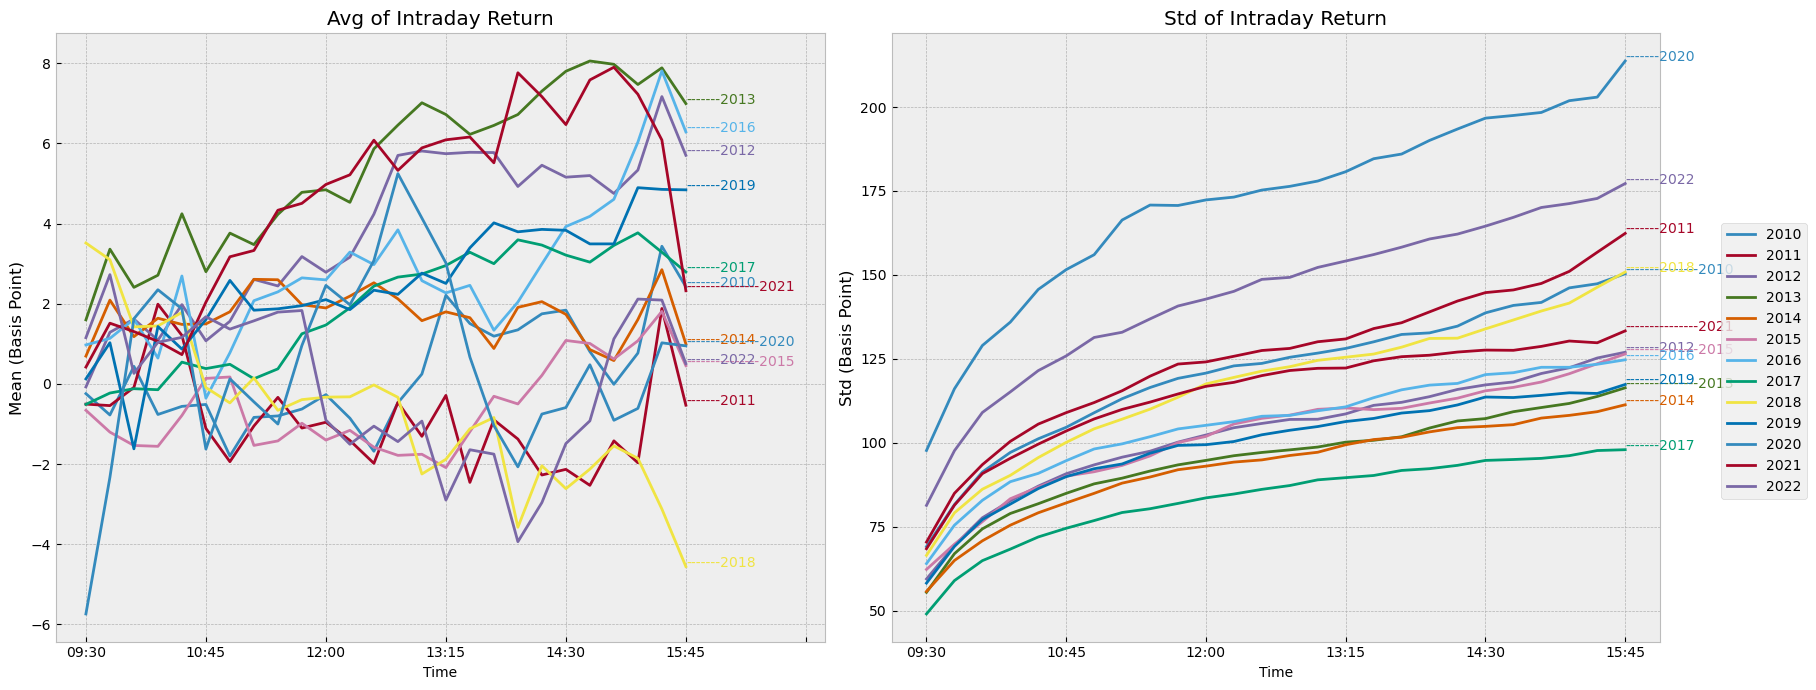

In [7]:
# Text annotation citing https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html
plt.style.use('bmh')

fig, ax = plt.subplots(1,2,figsize=(18,7))
intraday_summary_avg = (intraday_summary['mean']*100*100).T
intraday_summary_avg.plot(ax=ax[0])
ax[0].get_legend().remove()

intraday_summary_std = (intraday_summary['std']*100*100).T
intraday_summary_std.plot(ax=ax[1]).legend(bbox_to_anchor=(1.2, 0.7))

for line, name in zip(ax[0].lines, intraday_summary_avg.columns.tolist()):
    y=line.get_ydata()[-1]
    x=line.get_xdata()[-1]
    
    anno = '-'*7 if name in [2010,2011,2012,2013,2014,2016,2017,2018,2019,2022] else '-'*15
    text = ax[0].annotate(anno+str(name),xy=(x,y),xytext=(0,0),color=line.get_color(),xycoords=(ax[0].get_xaxis_transform(),ax[0].get_yaxis_transform()),textcoords='offset points')
    text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(ax[0].transData.inverted()).width)
    if np.isfinite(text_width):
        ax[0].set_xlim(ax[0].get_xlim()[0], text.xy[0] + text_width * 1.5)

for line, name in zip(ax[1].lines, intraday_summary_std.columns.tolist()):
    y=line.get_ydata()[-1]
    x=line.get_xdata()[-1]
    
    anno = '-'*7 if name in [2011,2012,2014,2016,2017,2018,2019,2020,2022] else '-'*15
    text = ax[1].annotate(anno+str(name),xy=(x,y),xytext=(0,0),color=line.get_color(),xycoords=(ax[1].get_xaxis_transform(),ax[1].get_yaxis_transform()),textcoords='offset points')
    
ax[0].set_ylabel('Mean (Basis Point)',fontsize=12)
ax[0].set_title('Avg of Intraday Return')
ax[1].set_ylabel('Std (Basis Point)',fontsize=12)
ax[1].set_title('Std of Intraday Return')
plt.tight_layout()
plt.show()

A follow up on the first point under Insight section. We plot the kernel density estimate for intraday returns of each 15 minute interval in 2022 as an example. This graph is consistent with the other two charts shown above, namingly that 1. Intraday returns center around 0, different time interval with slightly different means; 2. the difference among the standard deviations of different time intervals are more obvious (later in the trading session is more volatile than earlier in the trading session). This goes to confirm our initial statement that without any trading signals, we cannot conclude that there is an optimal exit time if we entered a position at market open.

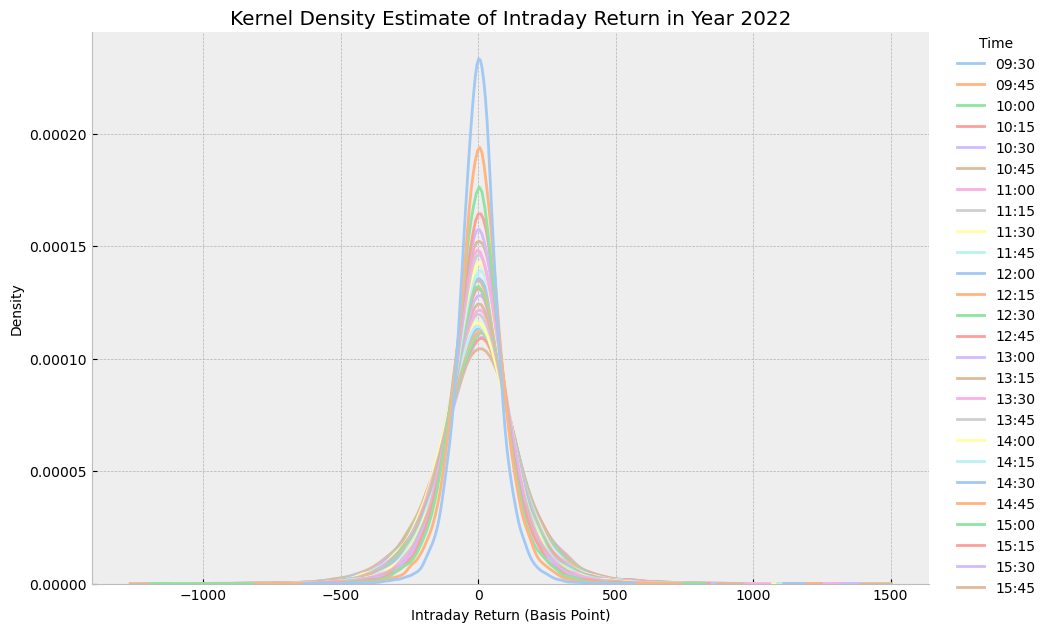

In [8]:
intraday_y2022 = intraday2.loc[intraday2['year']==2022].pivot_table(index=['Day','Symbol'],columns='Time',values='Intraday_Return')*100*100
sns.displot(intraday_y2022,kind='kde',palette='pastel',height=6,aspect=1.6)
plt.xlabel('Intraday Return (Basis Point)')
plt.title('Kernel Density Estimate of Intraday Return in Year 2022')
plt.show()

**As an ongoing research project, we can extend the analysis to answer the following questions: How does trading volume impact intraday return? How much of a role does intraday realized volatility play?** These topics will be the future direction of this project.